In [35]:
library(ggplot2)
library(plotly)
library(scales)

customers = read.csv('C:\\Users\\pmwash\\Desktop\\Disposable Docs\\CUSTOMER SUMMARY 2016 SEGMENTATION.csv', header=TRUE)
customers$CasesPerUniqueBrand = customers$Cases / customers$BrandId
customers$CasesPerUniqueSalesperson = customers$Cases / customers$SalespersonId
customers$CasesPerUniqueSalesperson_PercentOfTotal = customers$CasesPerUniqueSalesperson / customers$Cases
customers$CasesPerInvoiceLine = customers$Cases / customers$InvoiceLine
customers$GP = customers$Revenue - customers$Cost
customers$GPperBrand = customers$GP / customers$BrandId
customers$GPperBrandperCaseSold = customers$GPperBrand / customers$Cases
customers$GPperBrand_PercentOfTotal = customers$GPperBrand / customers$GP
customers$GPperSalesperson = customers$GP / customers$SalespersonId
customers$GPperSalesperson_PercentOfTotal = customers$GPperSalesperson / customers$GP

print(str(customers))

'data.frame':	9739 obs. of  58 variables:
 $ level_0                                        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ index                                          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Warehouse                                      : Factor w/ 4 levels "Columbia","Kansas City",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CustomerId                                     : int  3000019 3000020 3000021 3000022 3000023 3000024 3000025 3000026 3000027 3000028 ...
 $ InvoiceLine                                    : int  56 31 52 77 1652 68 106 527 1003 64 ...
 $ SalespersonId                                  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Invoice                                        : int  40 20 33 51 185 10 21 58 176 28 ...
 $ Revenue                                        : num  8853 3761 6695 18838 130105 ...
 $ AllottedWeeklyDeliveryDays                     : num  1 1 1 1 1 0.5 0.5 1 2 1 ...
 $ Cases                                          : num  5952 2616 4380 13800 27858 ..

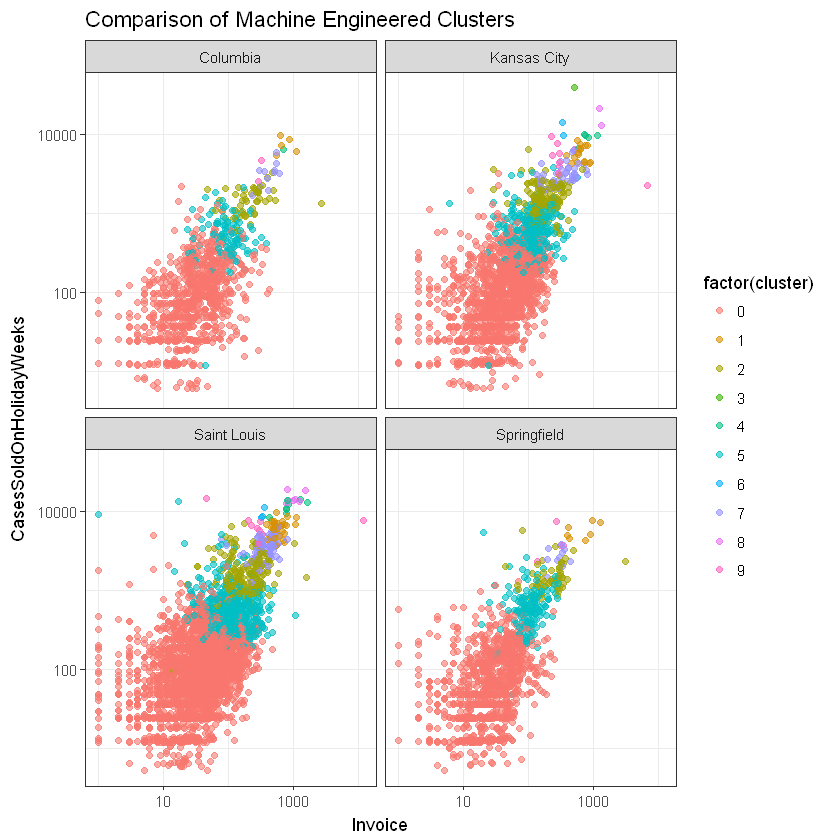

In [54]:
g = ggplot(data=customers[customers$CasesSoldOnHolidayWeeks > 5, ], 
           aes(x=Invoice, y=CasesSoldOnHolidayWeeks, group=factor(cluster)))
plot1 = g + 
    geom_point(aes(colour=factor(cluster)), alpha=0.6) +
    scale_y_log10() + 
    scale_x_log10() +
    theme_bw() +
    facet_wrap(~Warehouse) +
    #geom_smooth(method='lm', se=F) +
    ggtitle('Comparison of Machine Engineered Clusters')

plot1

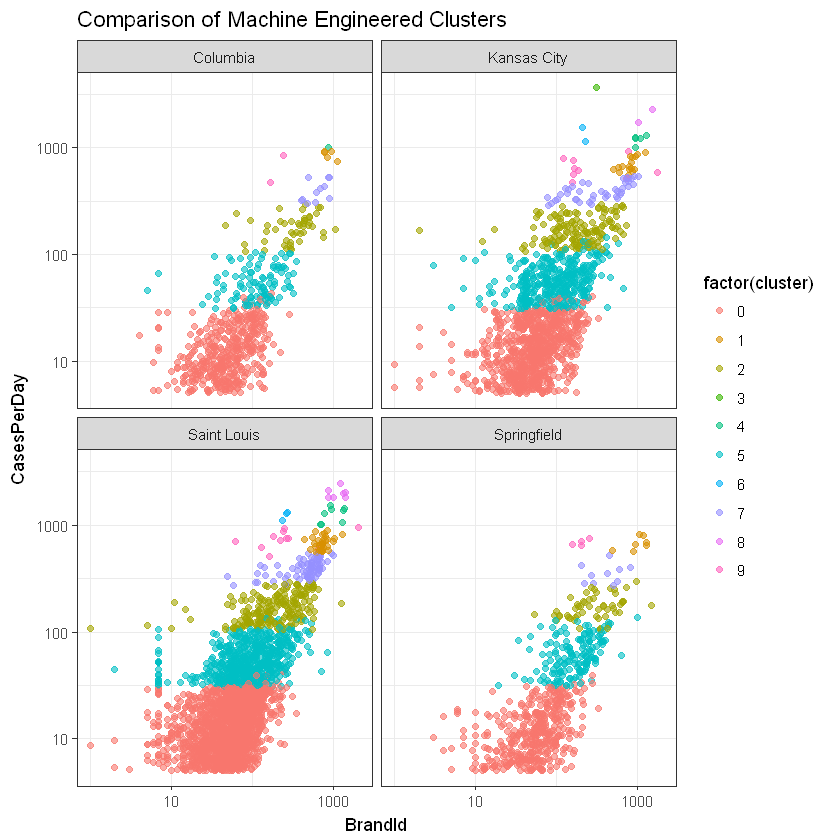

In [47]:
g = ggplot(data=customers[customers$CasesPerDay > 5, ],
           aes(x=BrandId, y=CasesPerDay, group=factor(cluster), label=CustomerId))
plot2 = g + 
    geom_point(aes(colour=factor(cluster)), alpha=0.6) +
    scale_y_log10() + scale_x_log10() +
    theme_bw() +
    facet_wrap(~Warehouse) +
    ggtitle('Comparison of Machine Engineered Clusters')

plot2

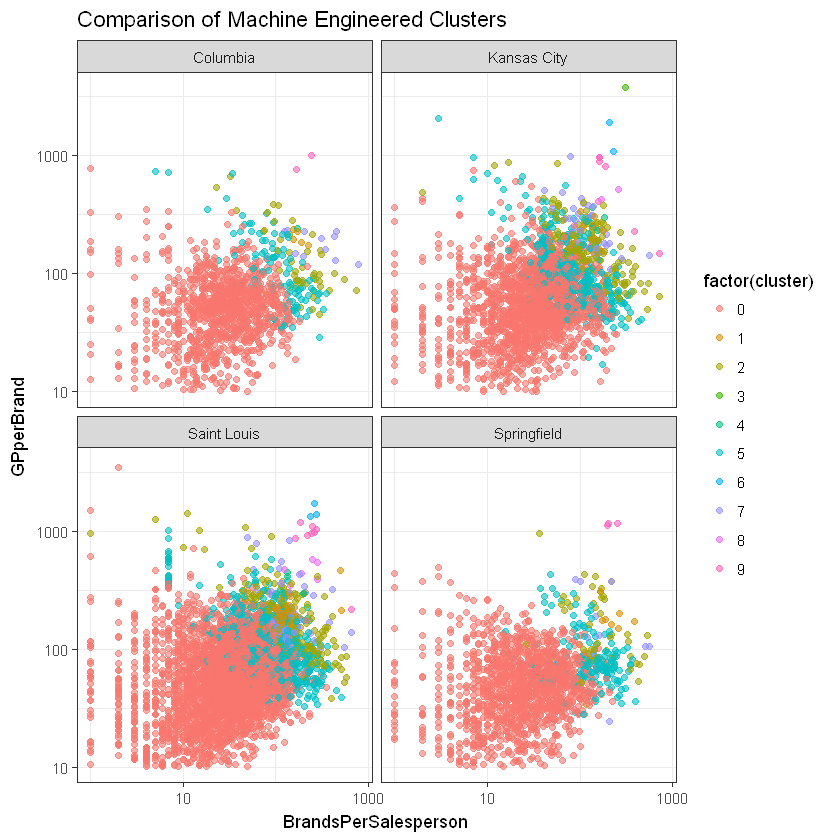

In [50]:
g = ggplot(data=customers[customers$GPperBrand > 10, ], 
           aes(x=BrandsPerSalesperson, y=GPperBrand, group=factor(cluster), label=CustomerId))
plot3 = g + 
    geom_point(aes(colour=factor(cluster)), alpha=0.6) +
    scale_y_log10() + scale_x_log10() +
    theme_bw() +
    facet_wrap(~Warehouse) +
    ggtitle('Comparison of Machine Engineered Clusters')

plot3